# Event Plots (inline version)

A NB template to ilustrate how to examine the features of events

In [1]:
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

2017-04-08 00:13:07


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import os
import time
import tables as tb
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from invisible_cities.database import load_db

In [5]:
import invisible_cities.core.mpl_functions as mpl
import invisible_cities.reco.tbl_functions as tbl
from invisible_cities.reco.params import S12Params, ThresholdParams
from   invisible_cities.core.system_of_units_c import units

In [7]:
from invisible_cities.core.mpl_functions import plot_pmt_waveforms, plot_pmt_signals_vs_time_mus, \
              plot_signal_vs_time_mus

In [38]:
from invisible_cities.reco.pmaps_functions import plot_s12

In [39]:
from icaro.core.event_pmaps import EventPmaps, print_s12, print_s2si

### Run Parameters

In [12]:
run_number = 3609

In [13]:
DataPMT = load_db.DataPMT(run_number)
DataSiPM = load_db.DataSiPM(run_number)
xs = DataSiPM.X.values
ys = DataSiPM.Y.values

In [14]:
RWF_file = os.path.join(os.environ['IC_DATA'],
                        'LSC/wvfms/{}/run_3609.gdc1next.next-new.135.rd_3609.root.h5'.format(run_number, run_number))

In [15]:
h5rwf = tb.open_file(RWF_file,'r')

In [16]:
pmtrwf, pmtblr, sipmrwf = tbl.get_vectors(h5rwf)

In [17]:
NEVT, NPMT, PMTWL = pmtrwf.shape
NEVT, NSIPM, SIPMWL = sipmrwf.shape
print("""
        Number of events in file = {}
        Number of PMTs = {}
        PMTWL = {}
        Number of SiPMs = {}
        SiPMWL = {}
      """.format(NEVT, NPMT, PMTWL,NSIPM, SIPMWL))


        Number of events in file = 82
        Number of PMTs = 12
        PMTWL = 52000
        Number of SiPMs = 1792
        SiPMWL = 1300
      


In [18]:
s1par  = S12Params(tmin=0*units.mus, tmax=600*units.mus, lmin=5, lmax=20, stride=4, rebin=False)
s2par = S12Params(tmin=645*units.mus, tmax=1300*units.mus, stride=160, lmin=80, lmax=20000, rebin=True)
thr    = ThresholdParams(thr_s1=3 * units.pes,  thr_s2=1 *units.pes,
                        thr_MAU = 3 * units.adc, thr_sipm = 3.5 * units.pes,
                        thr_SIPM = 30 * units.adc)

In [19]:
epm = EventPmaps(run_number, s1par, s2par, thr, verbose=True)

In [31]:
event=1
epm.calibrated_pmt_and_csum(event, pmtrwf)

129591.80180981458

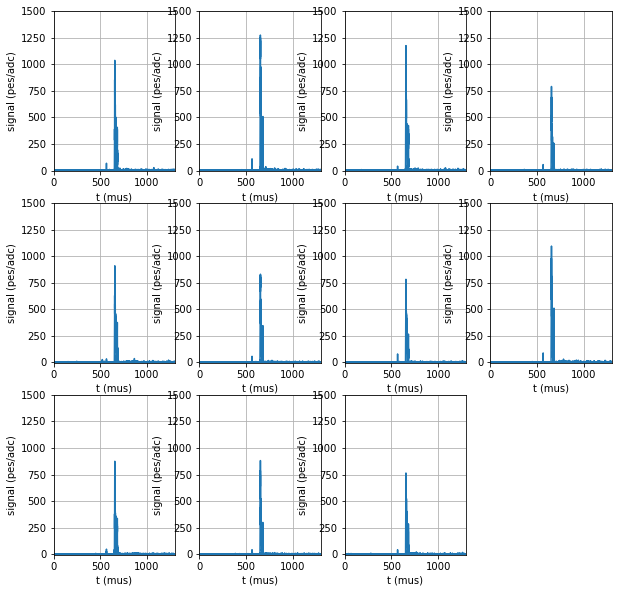

In [32]:
plot_pmt_signals_vs_time_mus(epm.CWF,
                                 epm.P.pmt_active,
                                 t_min      =    0,
                                 t_max      = 1300,
                                 signal_min =    -5,
                                 signal_max =  1500)

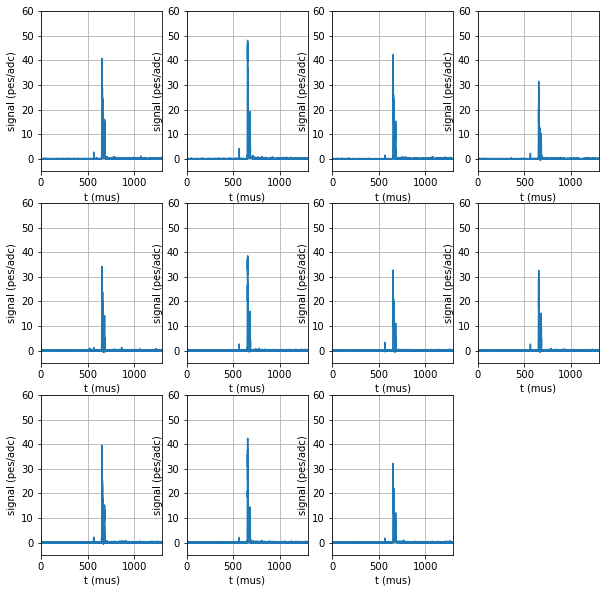

In [33]:
plot_pmt_signals_vs_time_mus(epm.CAL_PMT,
                             epm.P.pmt_active,
                             t_min      =    0,
                             t_max      = 1300,
                             signal_min =    -5,
                             signal_max =  60)

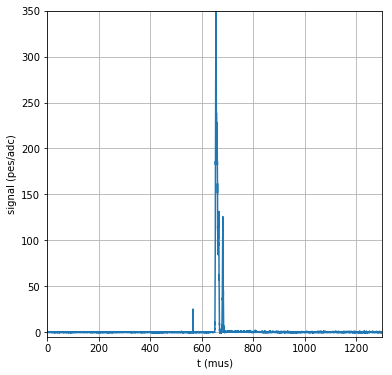

In [34]:
plot_signal_vs_time_mus(epm.csum, 
                            t_min=0, 
                            t_max=1300, 
                            signal_min=-5, 
                            signal_max=350)

In [35]:
epm.find_s1()

number of peaks = 1
S12 number = 0, samples = 13 sum in pes =152.46700079038712
time vector (mus) = [ 565.375  565.4    565.425  565.45   565.475  565.5    565.525  565.55
  565.575  565.6    565.625  565.65   565.675]
energy vector (pes) = [  3.02539079   9.68822498  18.04707186  24.03486778  25.21514411
  21.25444989  15.2315076   10.13020051   6.92881667   5.96959214
   5.53772609   4.33740276   3.0666056 ]


1

In [36]:
epm.find_s2()

number of peaks = 2
S12 number = 0, samples = 20 sum in pes =111390.8497670319
time vector (mus) = [ 650.256875    651.2625      652.2625      653.2625      654.2625
  655.2625      656.2625      657.2625      658.2625      659.2625
  660.2625      661.2625      662.2625      663.2625      664.2625
  665.2625      666.2625      667.2625      668.2625      669.53833333]
energy vector (pes) = [   149.22139068   1069.5329566    4022.61662231   9370.5768216
  12898.63873954  13409.53801206   9916.22491738   8092.9751276
   8490.44329739   8410.62762143   7300.21308893   5255.48219676
   4037.60285383   3801.55160717   4429.73028568   4838.58608719
   3539.54936934   1793.37868879    494.1090304      70.25105236]
S12 number = 1, samples = 9 sum in pes =16323.784674113045
time vector (mus) = [ 677.224375  678.4875    679.4875    680.4875    681.4875    682.4875
  683.4875    684.4875    685.5525  ]
energy vector (pes) = [  127.10316698   598.11567245  1696.434038    3439.44247219  4597.05354

2

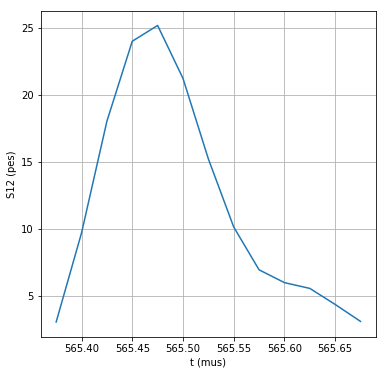

In [42]:
plot_s12(epm.S1)

In [43]:
epm.s1f

{0: S12Features(tmin=565375.0, tmax=565675.0, tpeak=565475.0, etot=152.46700079038712, epeak=25.215144112484467, width=300.0)}

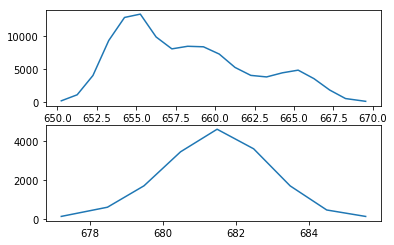

In [44]:
plot_s12(epm.S2)

In [ ]:
epm.s2f

In [ ]:
epm.find_ns1()

In [ ]:
dt = epm.s2f[0].tpeak - epm.s1f[0].tpeak

In [ ]:
dt/units.mus

In [ ]:
event=1
epm.calibrated_pmt_and_csum(event, pmtrwf)

In [ ]:
plot_pmt_signals_vs_time_mus(epm.CAL_PMT,
                             epm.P.pmt_active,
                             t_min      =    0,
                             t_max      = 1300,
                             signal_min =    -5,
                             signal_max =  7)

In [ ]:
plot_signal_vs_time_mus(epm.csum, 
                            t_min=0, 
                            t_max=1300, 
                            signal_min=-5, 
                            signal_max=60)

In [ ]:
epm.find_s1()
epm.find_s2()
epm.find_ns1()

In [ ]:
plot_s12(epm.S1)

In [ ]:
plot_s12(epm.S2)

In [ ]:
epm.s1f

This looks like a background event in conjunction with electron rain

In [ ]:
epm.s2f

In [ ]:
event=2
epm.calibrated_pmt_and_csum(event, pmtrwf)
epm.find_s1()
epm.find_s2()
epm.find_ns1()

In [ ]:
plot_pmt_signals_vs_time_mus(epm.CAL_PMT,
                             epm.P.pmt_active,
                             t_min      =    0,
                             t_max      = 1300,
                             signal_min =    -5,
                             signal_max =  10)

In [ ]:
plot_signal_vs_time_mus(epm.csum, 
                            t_min=0, 
                            t_max=1300, 
                            signal_min=-5, 
                            signal_max=60)

In [ ]:
plot_s12(epm.S1)

In [ ]:
plot_s12(epm.S2)

In [ ]:
epm.s1f

In [ ]:
epm.s2f

In [ ]:
def pmp(epm, event):
    epm.calibrated_pmt_and_csum(event, pmtrwf)
    
    plot_signal_vs_time_mus(epm.csum, 
                            t_min=0, 
                            t_max=1300, 
                            signal_min=-5, 
                            signal_max=60, figsize=(4,4))

    plt.show()
    print('+++S2+++++')
    epm.find_s2()
    if len(epm.S2) != 1:
        print('S2 not = 1')
        return 0
    plot_s12(epm.S2, figsize=(4,4))
    plt.show()
    print('s2f = {} '.format(epm.s2f[0]))
    
    print('+++S1+++++')
    epm.find_s1()
    if len (epm.S1) == 0:
        print('S1 == 0')
        return 0
    
    plot_s12(epm.S1, figsize=(4,4))
    
    for peak in epm.s1f:
        print('s1f = {} '.format(epm.s1f[peak]))
        dt = epm.s2f[0].tpeak - epm.s1f[peak].tpeak
        print('dt = {} mus'.format(dt/units.mus))
    

In [ ]:
def pmp_plot(epmx):
    plot_pmt_signals_vs_time_mus(epmx.CAL_PMT,
                             epmx.P.pmt_active,
                             t_min      =    0,
                             t_max      = 1300,
                             signal_min =    -5,
                             signal_max =  10, figsize=(4,4))
    plt.show()
    plot_signal_vs_time_mus(epmx.csum, 
                            t_min=0, 
                            t_max=1300, 
                            signal_min=-5, 
                            signal_max=60,figsize=(4,4))
    plt.show()
    plot_s12(epmx.S1)
    plt.show(
    plot_s12(epmx.S2))
    plt.show()

In [ ]:
pmp(epm,event=3)

S1 has large er which may be distinctive of ER

In [ ]:
pmp(epm,event=4)

In [ ]:
pmp(epm,event=5)

In [ ]:
pmp(epm,event=6)

In [ ]:
pmp(epm,event=8)

In [ ]:
pmp(epm,event=9)